Давыдов ПИм-231 лаба 4

1. Загрузите данные из файла в объект DataFrame, Добавьте заголовки к
столбцам: «index», «year», «month», «day», «min_t», «average_t», «max_t»,
«rainfall».
Расшифровка:

• index – индекс ВМО,

• year – год,

• month – месяц,

• day – день,

• min_t – минимальная температура воздуха,

• average_t – средняя температура воздуха,

• max_t – максимальная температура воздуха,

• rainfall – количество осадков.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_table('wr88125.txt', encoding='utf-8', names=['Index', 'Year',
                                                           'Month', 'Day', 'Min_t', 'Average_t', 'Max_t', 'Rainfall'], sep=';')
df

,Index,Year,Month,Day,Min_t,Average_t,Max_t,Rainfall
0,29838,1960,1,1,-6.9,-5.4,-3.8,0.1
1,29838,1960,1,2,-14.4,-10.0,-6.7,0.5
2,29838,1960,1,3,-21.7,-19.7,-13.4,0.0
3,29838,1960,1,4,-24.9,-21.4,-16.9,0.0
4,29838,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...,...
22276,29838,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,29838,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,29838,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,29838,2020,12,30,-21.8,-13.6,-9.9,0.8


2. Удалите столбец index.

In [ ]:
del df['Index']
df

,Year,Month,Day,Min_t,Average_t,Max_t,Rainfall
0,1960,1,1,-6.9,-5.4,-3.8,0.1
1,1960,1,2,-14.4,-10.0,-6.7,0.5
2,1960,1,3,-21.7,-19.7,-13.4,0.0
3,1960,1,4,-24.9,-21.4,-16.9,0.0
4,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...
22276,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,2020,12,30,-21.8,-13.6,-9.9,0.8


3. Используя метод info(), oтветьте на вопросы:

Есть ли в данных пропущенные значения?

В каком столбце данных больше всего пропущенных значений?

In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
has_missing_values = df.isna().any().any()
print(has_missing_values)
if has_missing_values == True:
  print('Пропущенные значения есть.')
else:
  print('Пропущенных значений нет.')

True
Пропущенные значения есть.


In [ ]:
column_most_missing = df.isna().sum().idxmax()
print("Столбец с большим количеством пропущенных значений: ", column_most_missing)

Столбец с большим количеством пропущенных значений:  Max_t


4. В данных за какой год больше всего пропусков?

In [ ]:
year_with_most_missing_values = df.groupby("Year").size().idxmax()
print("Год за который больше всего пропусков: ", year_with_most_missing_values)

Год за который больше всего пропусков:  1960


5. Объедините столбцы «Год», «Месяц» и «День» в один столбец «Дата» в
формате гггг-мм-дд (2000-01-20). Данные в новом столбце должны иметь
формат datetime;


In [ ]:
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]].astype(str).agg('-'.join, axis=1))
df = df.drop(columns=["Year", "Month", "Day"])
df

,Min_t,Average_t,Max_t,Rainfall,Date
0,-6.9,-5.4,-3.8,0.1,1960-01-01
1,-14.4,-10.0,-6.7,0.5,1960-01-02
2,-21.7,-19.7,-13.4,0.0,1960-01-03
3,-24.9,-21.4,-16.9,0.0,1960-01-04
4,-18.3,-8.0,-3.3,4.1,1960-01-05
...,...,...,...,...,...
22276,-41.7,-36.3,-32.8,0.0,2020-12-27
22277,-40.1,-34.2,-25.5,0.0,2020-12-28
22278,-28.2,-23.9,-18.6,0.0,2020-12-29
22279,-21.8,-13.6,-9.9,0.8,2020-12-30


6. Для каждого наблюдения рассчитайте размах температур (разность
максимальной и минимальной суточных температур) и количество
предшествующих ему дней без осадков (используйте циклы Python и
условный оператор):


In [ ]:
# Рассчет размаха температур
df["Max_t"] = df['Max_t'].astype(float)
df["Min_t"] = df['Min_t'].astype(float)
df["Temperature_range"] = df["Max_t"] - df["Min_t"]
df["Temperature_range"] = df["Temperature_range"].astype(float)
df

,Min_t,Average_t,Max_t,Rainfall,Date,Temperature_range
0,-6.9,-5.4,-3.8,0.1,1960-01-01,3.1
1,-14.4,-10.0,-6.7,0.5,1960-01-02,7.7
2,-21.7,-19.7,-13.4,0.0,1960-01-03,8.3
3,-24.9,-21.4,-16.9,0.0,1960-01-04,8.0
4,-18.3,-8.0,-3.3,4.1,1960-01-05,15.0
...,...,...,...,...,...,...
22276,-41.7,-36.3,-32.8,0.0,2020-12-27,8.9
22277,-40.1,-34.2,-25.5,0.0,2020-12-28,14.6
22278,-28.2,-23.9,-18.6,0.0,2020-12-29,9.6
22279,-21.8,-13.6,-9.9,0.8,2020-12-30,11.9


In [ ]:
# Рассчет количества предшествующих дней без осадков
# Инициализируем столбец Days_without_rain значением 0
df['Days_without_rain'] = 0
df["Rainfall"] = df['Rainfall'].astype(float)

# Счетчик для подсчета дней без осадков
days_without_rain_count = 0

# Проходим по строкам DataFrame
for index in range(1, len(df)):
    if df.at[index, 'Rainfall'] == 0:
        days_without_rain_count += 1
    else:
        days_without_rain_count = 0
    df.at[index + 1, 'Days_without_rain'] = days_without_rain_count
df['Days_without_rain'] = df['Days_without_rain'].astype(int)
df = df.drop(df.index[-3:])
df

,Min_t,Average_t,Max_t,Rainfall,Date,Temperature_range,Days_without_rain
0,-6.9,-5.4,-3.8,0.1,1960-01-01,3.1,0
1,-14.4,-10.0,-6.7,0.5,1960-01-02,7.7,0
2,-21.7,-19.7,-13.4,0.0,1960-01-03,8.3,0
3,-24.9,-21.4,-16.9,0.0,1960-01-04,8.0,1
4,-18.3,-8.0,-3.3,4.1,1960-01-05,15.0,2
...,...,...,...,...,...,...,...
22274,-23.4,-12.2,-6.5,2.4,2020-12-25,16.9,0
22275,-35.5,-31.6,-23.4,0.0,2020-12-26,12.1,0
22276,-41.7,-36.3,-32.8,0.0,2020-12-27,8.9,1
22277,-40.1,-34.2,-25.5,0.0,2020-12-28,14.6,2


7. Определите самый длинный период засухи.

In [ ]:
longest_period_drought = df['Days_without_rain'].max()
print("Самое большое количество дней без осадков (период засухи): ", longest_period_drought)

Самое большое количество дней без осадков (период засухи):  27


Для каждого года вычислите среднегодовую температуру и общее количество
осадков. Запишите результаты в объекты Series.

8.1. Какой год можно считать самым теплым? Какой самым холодным?

8.2. В какой год выпало больше всего осадков? В какой меньше всего?


In [ ]:
df['Year'] = df['Date'].dt.year
df['Average_t'] = df['Average_t'].astype(float)
# Группируем данные по годам и вычисляем среднегодовую температуру и общее количество осадков
annual_stats = df.groupby('Year').agg({'Average_t': 'mean', 'Rainfall': 'sum'})

# Создаем объекты Series для результатов
average_temperature = annual_stats['Average_t']
total_rainfall = annual_stats['Rainfall']

# Находим самый теплый год
warmest_year = average_temperature.idxmax()

# Находим самый холодный год
coldest_year = average_temperature.idxmin()

# Находим год с наибольшим количеством осадков
rainiest_year = total_rainfall.idxmax()

# Находим год с наименьшим количеством осадков
driest_year = total_rainfall.idxmin()

print("Самый теплый год:", warmest_year)
print("Самый холодный год:", coldest_year)
print("Год с наибольшим количеством осадков:", rainiest_year)
print("Год с наименьшим количеством осадков:", driest_year)

Самый теплый год: 2020
Самый холодный год: 1969
Год с наибольшим количеством осадков: 1970
Год с наименьшим количеством осадков: 1973


Используя запись имя_серии.plot() вы можете построить график и
посмотреть как изменялась температура. С помощью имя_серии. .plot.bar()
можно отобразить на столбиковой диаграмме количество осадков,
выпавших в каждый год.

<Axes: xlabel='Year'>

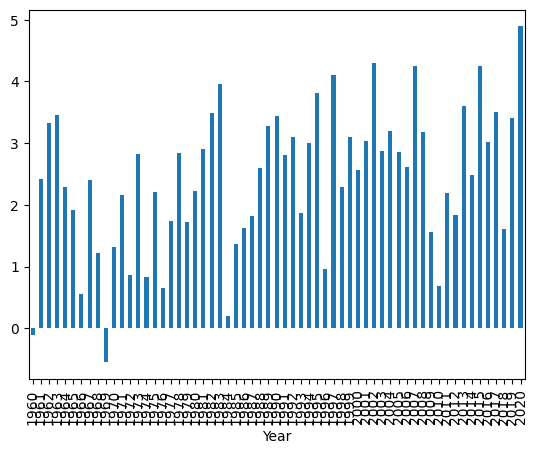

In [ ]:
average_temperature.plot.bar()

9. Выведете наблюдения, удовлетворяющие условиям:

9.1. Средняя температура воздуха ниже -30С (для некоторых регионов
можно использовать -10С, -35С, -40С).

9.2. Средняя температура воздуха выше 27С и количество дней без осадков
больше 3.

In [ ]:
condition_9_1 = df['Average_t'] < -30
condition_9_2 = (df['Average_t'] > 27) & (df['Days_without_rain'] > 3)

# Получаем наблюдения, которые соответствуют условиям
observations_9_1 = df[condition_9_1]
observations_9_2 = df[condition_9_2]

# Выводим результаты
print("Наблюдения, где средняя температура ниже -30С:")
print(observations_9_1)

print("\nНаблюдения, где средняя температура выше 27С и количество дней без осадков больше 3:")
print(observations_9_2)

Наблюдения, где средняя температура ниже -30С:
       Min_t  Average_t  Max_t  Rainfall       Date  Temperature_range  \
17     -31.4      -31.2  -27.2       0.0 1960-01-18                4.2   
18     -35.8      -33.2  -29.7       0.0 1960-01-19                6.1   
323    -31.3      -30.1    NaN       0.8 1960-11-19                NaN   
361    -34.2      -30.2    NaN       0.0 1960-12-27                NaN   
373    -36.2      -34.5    NaN       0.0 1961-01-08                NaN   
...      ...        ...    ...       ...        ...                ...   
21585  -38.0      -32.0  -24.3       0.0 2019-02-05               13.7   
21588  -38.3      -32.8  -24.8       0.0 2019-02-08               13.5   
22275  -35.5      -31.6  -23.4       0.0 2020-12-26               12.1   
22276  -41.7      -36.3  -32.8       0.0 2020-12-27                8.9   
22277  -40.1      -34.2  -25.5       0.0 2020-12-28               14.6   

       Days_without_rain  Year  
17                     1  1960 